In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [2]:
df= pd.read_csv("https://raw.githubusercontent.com/FlipRoboTechnologies/ML-Datasets/main/Medical%20Cost%20Insurance/medical_cost_insurance.csv")
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [4]:
df.shape

(1338, 7)

in this data some of categorical columns and some is continuous data inwhich one is target and other is features variables


In [5]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [6]:
df.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


in thisdata 4 is numeric columns and 3 are object or categorical columns and non null present

In [8]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

<Axes: >

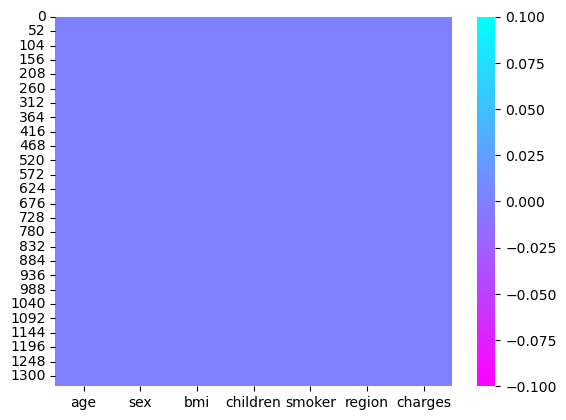

In [9]:
# lets check again null vlues
sns.heatmap(df.isnull(),cmap= "cool_r")

In [10]:
df.dtypes.index

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [3]:
#seprating numerical and categorical columns

#checking categerical columns\
categorical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]== "object":
        categorical_col.append(i)
print('categorical columns:',categorical_col)
print('\n')


#checking numerical columns
numerical_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]!='object':
        numerical_col.append(i)
print('numerical columns:',numerical_col)

categorical columns: ['sex', 'smoker', 'region']


numerical columns: ['age', 'bmi', 'children', 'charges']


In [12]:
df.nunique().to_frame("no. of uniques values")

,no. of uniques values
age,47
sex,2
bmi,548
children,6
smoker,2
region,4
charges,1337


In [13]:
# summary of numeric columns

In [4]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


in this data no null presents and count of each columns same
1) the mean value of aage, bmi, children approx same hence mimimum chance of outliers
2) standard deviation of children columns is high from mean value chances of skewness 
3) charges columns max differnce occers between 75% and max quartile

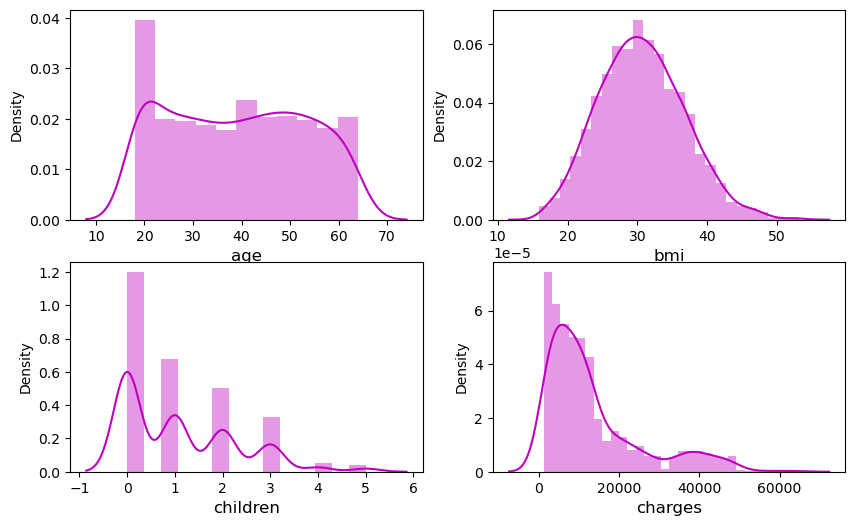

In [5]:
# visiualization of numeric columns
plt.figure(figsize=(10,6), facecolor='white')
plotnumber=1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[col],color='m')
        plt.xlabel(col,fontsize=12)
    plotnumber+=1
plt.show()    

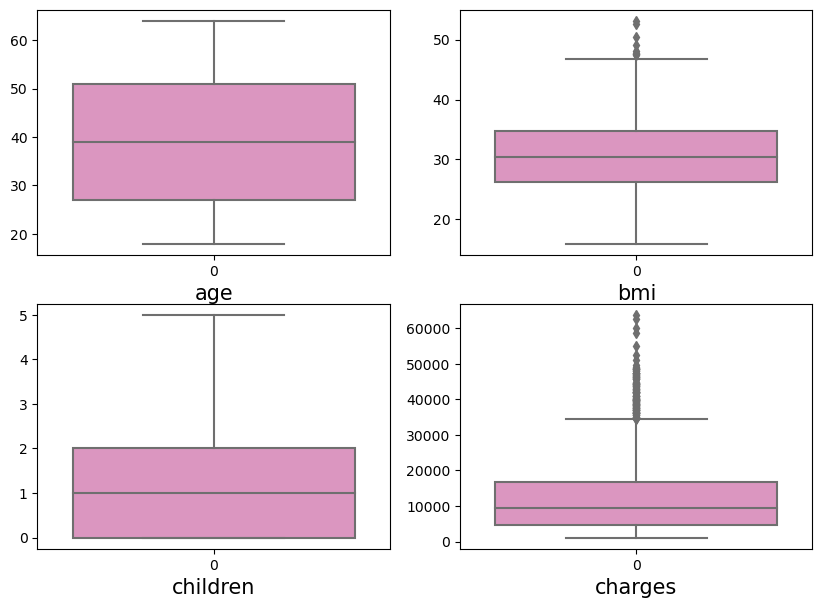

In [19]:
plt.figure(figsize= (10,7), facecolor= 'white')
plotnumber= 1
for col in numerical_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2, plotnumber)
        sns.boxplot(df[col], palette= 'Set2_r')
        plt.xlabel(col,fontsize=15)
    plotnumber+=1
plt.show()

in tjis plot we see that outliers present in bmi and charges columns so handle this with right methods

In [6]:
#find the iqr to identify outliers
q1= df.quantile(0.25)
q3= df.quantile(0.75)
iqr= q3-q1

In [7]:
higher_side= q3+(1.5*iqr)
lower_side= q1-(1.5*iqr)

In [8]:
bmi_high= (q3.bmi+(1.5*iqr.bmi))
bmi_high

47.290000000000006

In [9]:
np_index=np.where(df['bmi']>bmi_high)

In [10]:
np_index

(array([ 116,  286,  401,  543,  847,  860, 1047, 1088, 1317], dtype=int64),)

In [11]:
df=df.drop(df.index[np_index])

In [12]:
df.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


In [13]:
charges_high=(q3.charges+(1.5*iqr.charges))

In [14]:
np_index1=np.where(df['charges']>charges_high)
np_index1

(array([  14,   19,   23,   29,   30,   34,   38,   39,   49,   53,   55,
          82,   84,   86,   94,  109,  122,  145,  157,  160,  174,  184,
         202,  222,  239,  241,  250,  251,  253,  255,  262,  264,  270,
         280,  286,  290,  296,  310,  312,  320,  325,  326,  328,  336,
         371,  375,  379,  417,  418,  419,  438,  473,  485,  497,  521,
         527,  545,  554,  565,  573,  583,  605,  611,  617,  619,  625,
         661,  663,  664,  670,  673,  678,  685,  693,  702,  721,  732,
         734,  735,  738,  755,  799,  815,  822,  824,  838,  841,  845,
         847,  851,  877,  887,  895,  911,  941,  945,  947,  950,  952,
        1006, 1015, 1016, 1025, 1030, 1031, 1042, 1055, 1063, 1071, 1082,
        1088, 1103, 1109, 1110, 1114, 1116, 1131, 1138, 1144, 1148, 1178,
        1198, 1199, 1210, 1222, 1232, 1233, 1241, 1276, 1280, 1283, 1292,
        1293, 1295, 1305, 1314], dtype=int64),)

In [15]:
df.drop(df.index[np_index1])

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [16]:
df.reset_index()

,index,age,sex,bmi,children,smoker,region,charges
0,0,19,female,27.900,0,yes,southwest,16884.92400
1,1,18,male,33.770,1,no,southeast,1725.55230
2,2,28,male,33.000,3,no,southeast,4449.46200
3,3,33,male,22.705,0,no,northwest,21984.47061
4,4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...,...
1324,1333,50,male,30.970,3,no,northwest,10600.54830
1325,1334,18,female,31.920,0,no,northeast,2205.98080
1326,1335,18,female,36.850,0,no,southeast,1629.83350
1327,1336,21,female,25.800,0,no,southwest,2007.94500


In [33]:
df.shape

(1329, 7)

In [35]:
# lets check relationshin ship between features and target

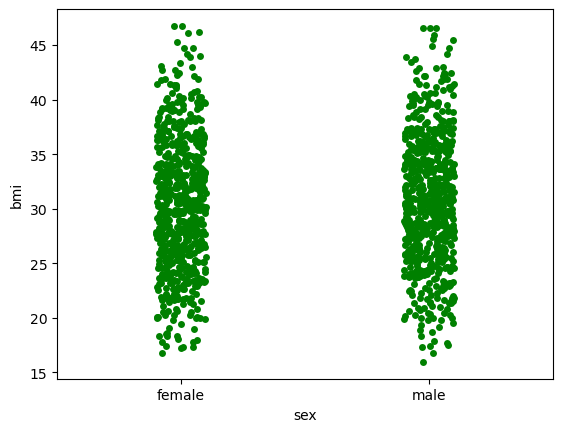

In [17]:

sns.stripplot(x='sex',y='bmi',data=df,color='g')
plt.show()

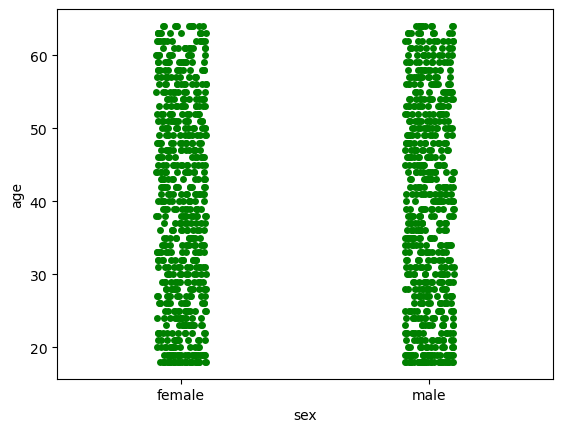

In [42]:
sns.stripplot(x='sex',y='age',data=df,color='g')
plt.show()

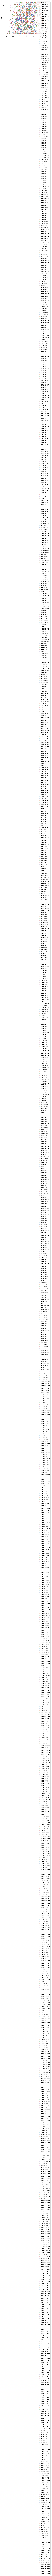

In [18]:
sns.scatterplot(x='bmi',y='age',hue='charges',data=df, palette= 'deep')
plt.show()

In [20]:
# lets convrt categorical columns in to binary numbers using encoder techniques

In [38]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer

ohe = OneHotEncoder()



In [42]:
data=pd.get_dummies(df[['sex','smoker','region']])
data

,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,1,0,0,1,0,0,0,1
1,0,1,1,0,0,0,1,0
2,0,1,1,0,0,0,1,0
3,0,1,1,0,0,1,0,0
4,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...
1333,0,1,1,0,0,1,0,0
1334,1,0,1,0,1,0,0,0
1335,1,0,1,0,0,0,1,0
1336,1,0,1,0,0,0,0,1


In [45]:
df.drop(['sex','smoker','region'],axis=1,inplace= True)

In [47]:
data1=df.join(data)

In [48]:
data1

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [49]:
#checkingcorrelation by using heat map

In [51]:
data1.corr()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
age,1.000000,0.114686,0.043041,0.302022,0.019143,-0.019143,0.024505,-0.024505,0.001766,-0.000283,-0.011581,0.010474
bmi,0.114686,1.000000,0.017355,0.193196,-0.039958,0.039958,0.002871,-0.002871,-0.136193,-0.128598,0.255863,0.000651
children,0.043041,0.017355,1.000000,0.069739,-0.019281,0.019281,-0.007577,0.007577,-0.024857,0.024209,-0.018816,0.020021
charges,0.302022,0.193196,0.069739,1.000000,-0.063394,0.063394,-0.785912,0.785912,0.009750,-0.037704,0.071597,-0.045906
sex_female,0.019143,-0.039958,-0.019281,-0.063394,1.000000,-1.000000,0.079854,-0.079854,-0.000573,0.009961,-0.010263,0.001195
sex_male,-0.019143,0.039958,0.019281,0.063394,-1.000000,1.000000,-0.079854,0.079854,0.000573,-0.009961,0.010263,-0.001195
smoker_no,0.024505,0.002871,-0.007577,-0.785912,0.079854,-0.079854,1.000000,-1.000000,-0.004947,0.035940,-0.068270,0.039440
smoker_yes,-0.024505,-0.002871,0.007577,0.785912,-0.079854,0.079854,-1.000000,1.000000,0.004947,-0.035940,0.068270,-0.039440
region_northeast,0.001766,-0.136193,-0.024857,0.009750,-0.000573,0.000573,-0.004947,0.004947,1.000000,-0.322387,-0.343402,-0.321730
region_northwest,-0.000283,-0.128598,0.024209,-0.037704,0.009961,-0.009961,0.035940,-0.035940,-0.322387,1.000000,-0.344807,-0.323046


In [52]:
#separatevaribles target and features
x= data1.drop('charges',axis=1)
y= data1['charges']

In [53]:
print(x.shape)
print(y.shape)

(1329, 11)
(1329,)


In [54]:
#standardized our data 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit_transform(x)
x.head()

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0


In [56]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [57]:
maxAccu = 0
maxRS = 0
for i in range(1,200):
    x_train, x_test, y_train, y_test= train_test_split(x, y, test_size= 0.30, random_state= i)
    dtc=  DecisionTreeClassifier()
    dtc.fit(x_train,y_train)
    pred= dtc.predict(x_test)
    acc=accuracy_score(y_test,pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('best accuracy is', maxAccu, 'at random state', maxRS)

ValueError: Unknown label type: 'continuous'